In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dados = pd.read_csv('casos_e_mortes_confirmados.csv')

In [3]:
dados_grupo = dados.groupby('Pais')

In [4]:
dados_grupo.get_group('USA').tail()

,Data,Casos,Mortes,Pais,Dias,Porcentagem
35,09/04/2020,461437,16478,USA,35,3.57
36,10/04/2020,496535,18586,USA,36,3.74
37,11/04/2020,526396,20463,USA,37,3.89
38,12/04/2020,555313,22020,USA,38,3.97
39,13/04/2020,580619,23529,USA,39,4.05


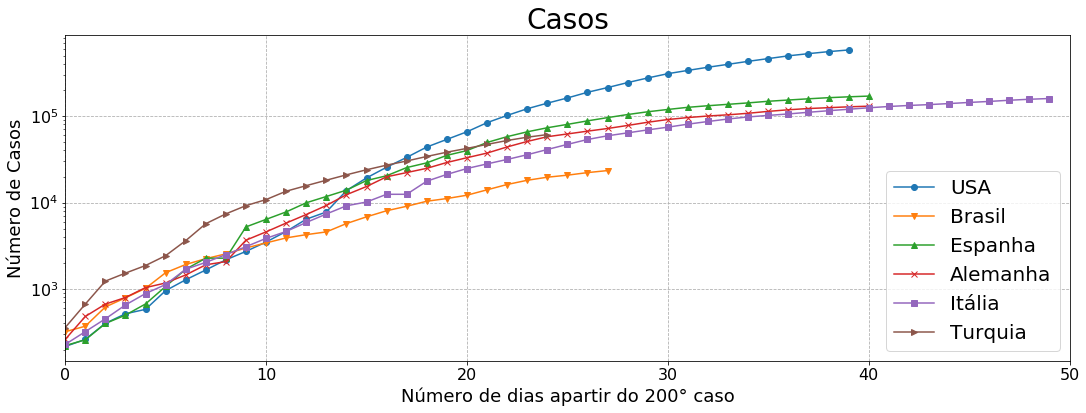

In [5]:
x_ticks = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
m       = ['o', 'v', '^', 'x', 's', '>']

fig, ax = plt.subplots(figsize=(18, 6))

for i, name in enumerate(['USA', 'Brasil', 'Espanha', 'Alemanha', 'Itália', 'Turquia' ]):
    ax.semilogy(dados_grupo.get_group(name).Dias, dados_grupo.get_group(name).Casos, label = name, marker = m[i])

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(16)

ax.set_xlim(0, 50)
ax.set_xlabel('Número de dias apartir do 200° caso', fontsize = 18)
ax.set_ylabel('Número de Casos', fontsize = 18)
ax.legend(loc = 'lower right', fontsize = 20)
ax.set_title('Casos', fontsize = 28)
ax.grid(ls = '--')

ax

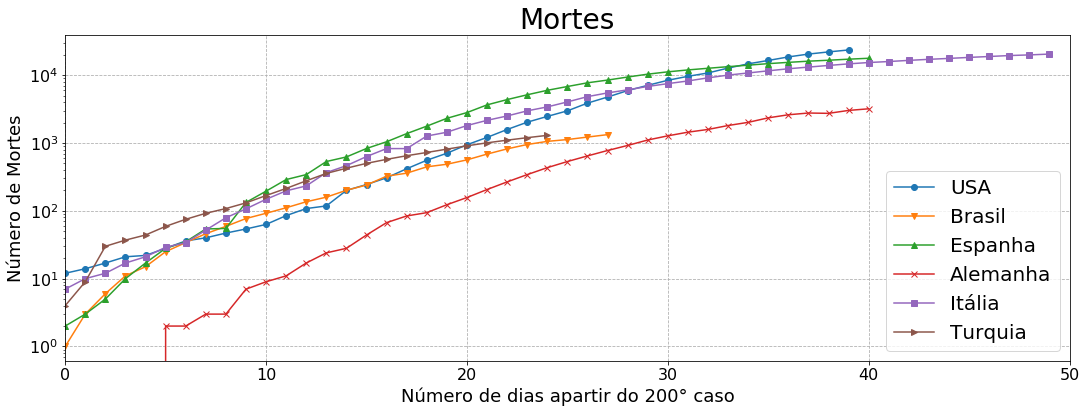

In [6]:
x_ticks = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
m       = ['o', 'v', '^', 'x', 's', '>']

fig, ax = plt.subplots(figsize=(18, 6))

for i, name in enumerate(['USA', 'Brasil', 'Espanha', 'Alemanha', 'Itália', 'Turquia' ]):
    ax.semilogy(dados_grupo.get_group(name).Dias, dados_grupo.get_group(name).Mortes, label = name, marker = m[i])

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(16)

    ax.set_xlim(0, 50)
ax.set_xlabel('Número de dias apartir do 200° caso', fontsize = 18)
ax.set_ylabel('Número de Mortes', fontsize = 18)
ax.legend(loc = 'lower right', fontsize = 20)
ax.set_title('Mortes', fontsize = 28)
ax.grid(ls = '--')

ax

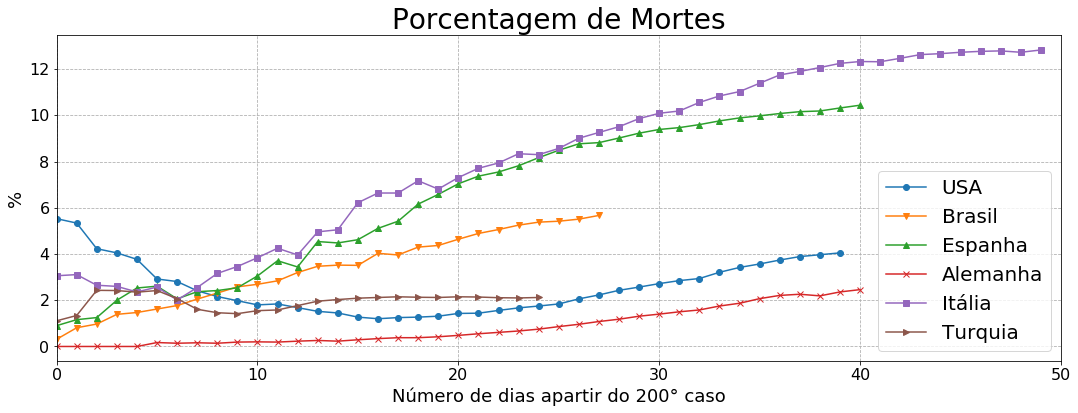

In [7]:
x_ticks = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]
m       = ['o', 'v', '^', 'x', 's', '>']

fig, ax = plt.subplots(figsize=(18, 6))

for i, name in enumerate(['USA', 'Brasil', 'Espanha', 'Alemanha', 'Itália', 'Turquia' ]):
    ax.plot(dados_grupo.get_group(name).Dias, dados_grupo.get_group(name).Porcentagem, label = name, marker = m[i])

# Set the tick labels font
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(16)

ax.set_xlim(0, 50)
ax.set_xlabel('Número de dias apartir do 200° caso', fontsize = 18)
ax.set_ylabel('%', fontsize = 18)
ax.legend(loc = 'lower right', fontsize = 20)
ax.set_title('Porcentagem de Mortes', fontsize = 28)
ax.grid(ls = '--')

ax